Proceed with the dataset and find the best classifier predicting survivability.
*   Use all the classifiers covered so far. Provide automatic mechanism to compare performance of various models.
*   If you would like to look for some other classifiers in sklearn, then it is OK.
*   Use pipelines if necessary, especially if you decide to use normalization/standardization or PCA.
*   For each model, try to find the best hyperparameters.
*   For various results of cross-validation present ROCs and PRCs.
*   If you lack data (`NaN` etc.), do not skip the samples. Instead, impute them: the best option is to find similar samples (on the basis of other features) and then calculate the missing data by taking mean value. You can apply some basic form of clustering. KNNs are also the option.

**This homework is obligatory. Just do as much time lets you. Even a small analysis will be welcome. Please send colab link to krusek@agh.edu.pl before 17.04.2024. Give permission to edit!**

## https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html
0. Survived Indicator
1. Passenger Class
2. Name
3. Sex
4. Age
5. Siblings Aboard
6. Parents Aboard
7. Fare paid in £s


- survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat - Lifeboat (if survived)
- body - Body number (if did not survive and body was recovered)

In [1]:
!pip install -r ../requirements.txt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import platform
import pandas as pd
import numpy as np
import warnings
import sys;
#define Seaborn color palette to use
import numpy as np
from math import ceil
from itertools import zip_longest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
import missingno as msno
import re



In [2]:
import logging
from rich.logging import RichHandler

FORMAT = "%(message)s"
logging.basicConfig(
    level="NOTSET", format=FORMAT, datefmt="[%X]", handlers=[RichHandler()]
)

logger = logging.getLogger("rich")


In [3]:

v = platform.python_version_tuple();
if float(v[1]) < 10:
    raise Exception("MUST USE Python 3.10 to use MATCH expression!")

warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
np.set_printoptions(threshold=sys.maxsize)
pd.options.display.max_colwidth = 1000

from enum import Enum, unique

@unique
class PDataType(Enum):
    NUMERICAL = 1
    CATHEGORICAL = 2

def remove_distinct_value_features(df):
    return [e for e in df.columns if df[e].nunique() == 1]

def get_data_type(df, type):
    match type:
        case PDataType.NUMERICAL:
            return df.select_dtypes(np.number);
        case PDataType.CATHEGORICAL:
            return df.select_dtypes(include='object');

#select all cathegorigal data where the first value is more than percent%?
def get_cathegorical_data_by_percent(df, percent):
    col_names = get_data_type(df,PDataType.CATHEGORICAL)
    to_return = []
    for col_name in col_names:
        unique_v_df = (df[col_name].value_counts()).to_frame()
        unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
        if unique_v_df.iloc[0].percent > percent:
            to_return.append(col_name);
    return to_return
    
def fill_empty_data_with(df, type, filler):
    col_names = get_data_type(df,type)
    for c in col_names:
        test_data_csv[c] = test_data_csv[c].fillna(filler)


In [4]:
DO_NOT_PLOT = False

In [5]:


def plot_pie_for_unique_category(df,col_name_x, ax):
    if not DO_NOT_PLOT:
        colors = sns.color_palette('pastel')
        unique_v_df = (df[col_name_x].value_counts()).to_frame()
        unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
        unique_v_df.plot.pie(y='count', use_index=True,autopct='%0.2f%%', title = f"{col_name_x}", ax = ax)


def plot_hist_for_unique_category(df,col_name_x,col_name_y):
    if not DO_NOT_PLOT:
        unique_v_df = (df[col_name_x].value_counts()).to_frame()
        unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
        fig, axs = plt.subplots(nrows=len(unique_v_df), figsize=(16,10))
        i = 0;
        for index, row in unique_v_df.iterrows():
            value_percent = row.iloc[1];
            value = row.iloc[0];
            name = index;
            sns.histplot(data=df.loc[df[col_name_x] == name], x=col_name_y, ax = axs[i],bins=100, label =f'{col_name_x} {name} : {value} | {value_percent:.2f}%')
            axs[i].set_xlim(df[col_name_y].min(), df[col_name_y].max())
            axs[i].legend()
            i+=1
        fig.suptitle(f"{col_name_x} on {col_name_y}")
        plt.show()
        
def plot_hist_for_stat(df,col_name_x, stat = 'count'):
    if not DO_NOT_PLOT:
        sns.histplot(data=df, x=col_name_x, stat = stat)
        plt.legend()
        plt.show()
                     
    
def plot_unique_category(df,col_name_x,col_name_y):
    if not DO_NOT_PLOT:
        plot_hist_for_unique_category(df,col_name_x,col_name_y)
        fig, axs = plt.subplots(1, 2, figsize=(10,10))
        fig.tight_layout()
        plot_pie_for_unique_category(df,col_name_x,axs[0])
        sns.boxenplot(data=df, x=col_name_x, y=col_name_y, ax = axs[1])
        plt.show()
    
def plot_hist_for_unique_category_array(df,col_names_x,col_name_y):
    if not DO_NOT_PLOT:
        for col_name_x in col_names_x:
            plot_hist_for_unique_category(df,col_name_x,col_name_y)
            plt.show()

#RAVEL returns flatted array, depricated. use to_numpy
def plot_pie_for_unique_category_array(df,col_names_x):
    if not DO_NOT_PLOT:
        n_rows, n_cols = ceil(len(col_names_x) / 3), 3
        fig, axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(20, 80))
        for col_name_x,ax in zip_longest(col_names_x,axs.ravel()):
            if col_name_x is not None:
                colors = sns.color_palette('pastel')
                unique_v_df = (df[col_name_x].value_counts()).to_frame()
                unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
                unique_v_df.plot.pie(y='count', use_index=True,autopct='%0.2f%%', title = f"{col_name_x}",ax=ax )
            else:
                fig.delaxes(ax)
        plt.draw()
        plt.tight_layout()
    

def plot_correlation_for(df, col_name, n):
    corr = df.corr(numeric_only=True)[col_name].sort_values(ascending=False)
    top_corr = corr[1:n]
    selected_features = list(top_corr.index) + [col_name]
    correlation_matrix = df[selected_features].corr()
    mask = np.triu(correlation_matrix)
    if not DO_NOT_PLOT:
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f", vmin=-1, vmax=1,mask=mask)
        plt.title(f"Top of correlation with [{col_name}]", fontsize=16)
        plt.show()
    return top_corr

def plot_overall_correlation_for(df,target_cols,n_count):
    df_no_target = df.copy().drop(columns = target_cols)
    top_correlation = df_no_target.corr().unstack().sort_values(ascending = False).drop_duplicates()[1:n_count]
    top_correlation.plot.bar(grid = True)
    return  top_correlation
def scikit_model_vis(y_valid, y_pred):
    if not DO_NOT_PLOT:
        plt.figure()
        plt.scatter(y_valid, y_pred)
        plt.xlabel('ground truth (y_valid)')
        plt.ylabel('predict (y_pred)')
        plt.show()

    logger.info(f'MAE: {metrics.mean_absolute_error(y_valid, y_pred):.2f}')
    logger.info(f'MSE: {metrics.mean_squared_error(y_valid, y_pred):.2f}')
    logger.info(f'R2: {metrics.r2_score(y_valid, y_pred):.2f}')

In [6]:
#@markdown You know this data, but so far you had the opportunity to work with classification on it
#https://www.openml.org/search?type=data&sort=runs&id=40945&status=active
#titanic = pd.read_csv('https://raw.githubusercontent.com/GokuMohandas/MadeWithML/main/datasets/titanic.csv')
df = fetch_openml("titanic", version=1, as_frame=True)
df = df['frame']
display(df)


/home/mg/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/home/mg/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_arff_parser.py:200: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  frame = pd.concat(dfs, ignore_index=True)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,None,C,None,328.0,None
1305,3.0,0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,None,C,None,NaN,None
1306,3.0,0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,None,C,None,304.0,None
1307,3.0,0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,None,C,None,NaN,None


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   survived   1309 non-null   category
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   float64 
 6   parch      1309 non-null   float64 
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
dtypes: category(3), float64(6), object(5)
memory usage: 116.8+ KB


## Convert some data, cleanup

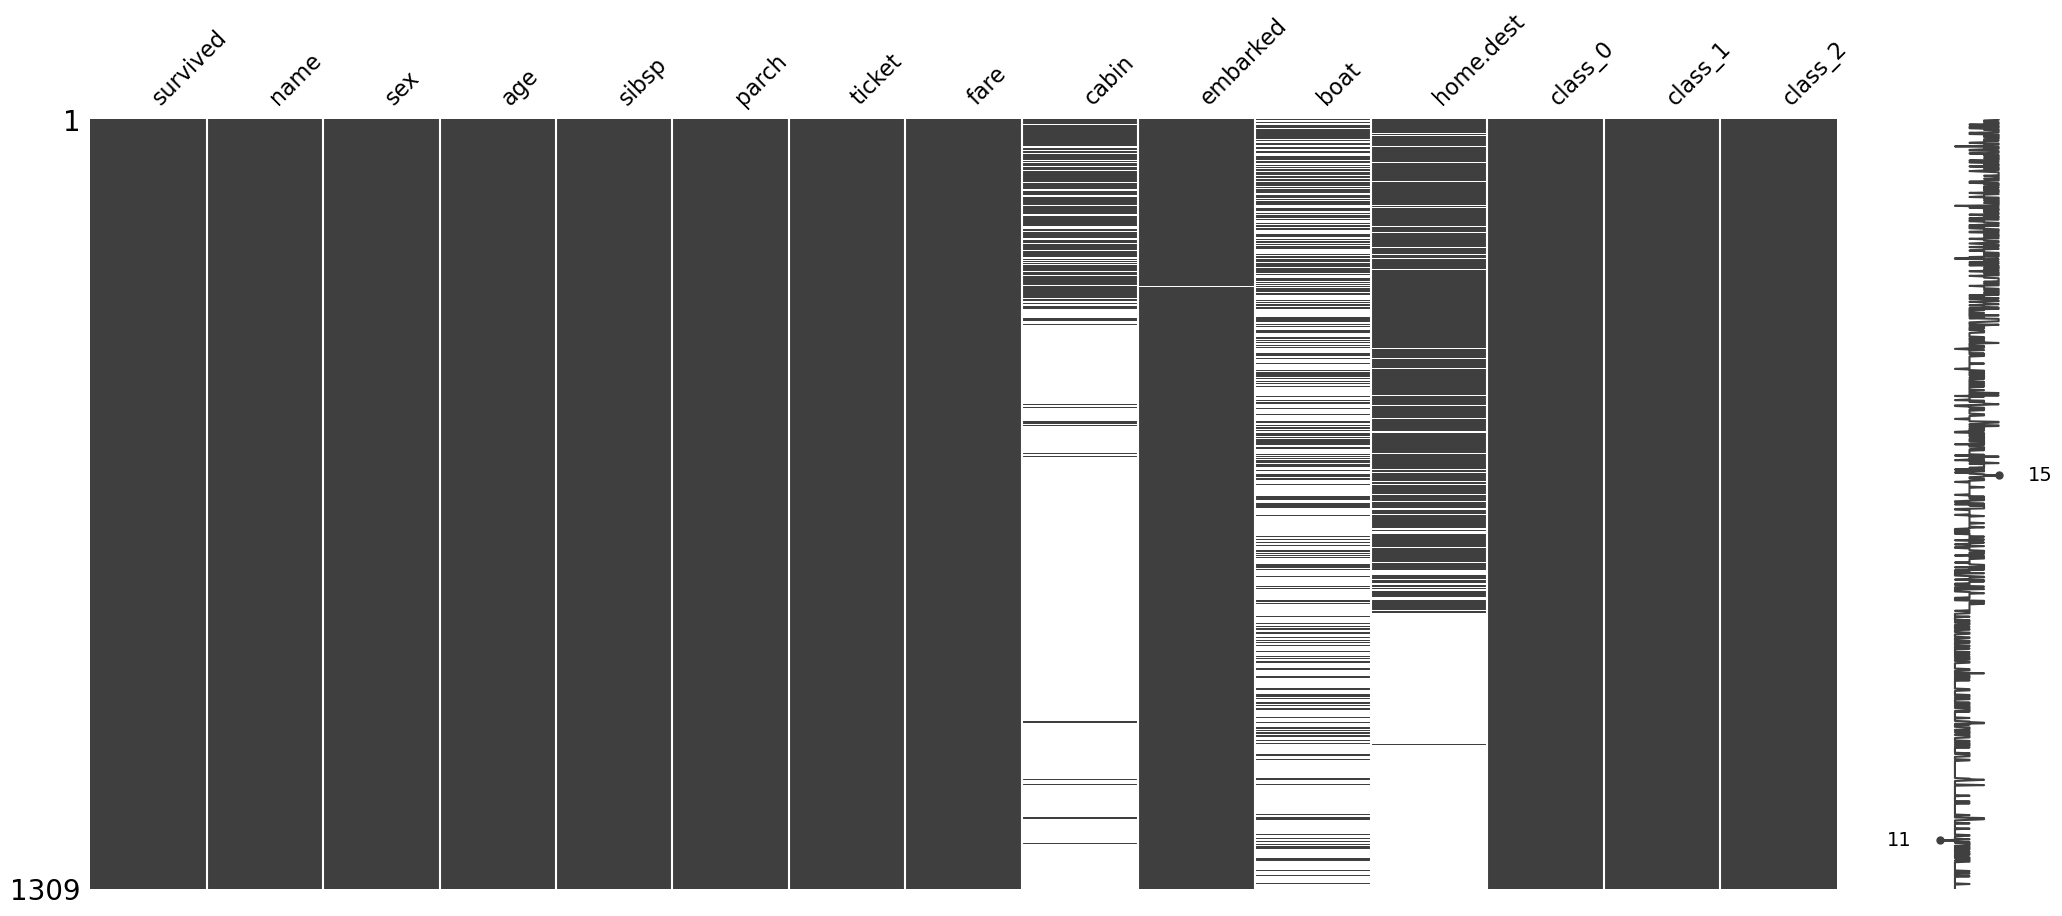

In [25]:
msno.matrix(df)
plt.show()

In [9]:
logger.info("NULL: ")

logger.info(df.isnull().sum())
logger.info("DUPLICATED: ")
logger.info(df.duplicated().sum())


           INFO     NULL:                                                                           ]8;id=899996;file:///tmp/ipykernel_56661/3989102858.py\3989102858.py]8;;\:]8;id=727281;file:///tmp/ipykernel_56661/3989102858.py#1\1]8;;\

           INFO     pclass          0                                                               ]8;id=935762;file:///tmp/ipykernel_56661/3989102858.py\3989102858.py]8;;\:]8;id=381540;file:///tmp/ipykernel_56661/3989102858.py#3\3]8;;\
                    survived        0                                                                              
                    name            0                                                                              
                    sex             0                                                                              
                    age           263                                                                              
                    sibsp           0                                                                              
                    parch           0                                                                              
                    ticket          0                                                                              
                    fare            1                                                                              
                    cabin        1014                                                                              
                    embarked        2                                                                              
                    boat          823                                                                              
                    body         1188                                                                              
                    home.dest     564                                                                              
                    dtype: int64                                                                                   

           INFO     DUPLICATED:                                                                     ]8;id=60236;file:///tmp/ipykernel_56661/3989102858.py\3989102858.py]8;;\:]8;id=37788;file:///tmp/ipykernel_56661/3989102858.py#4\4]8;;\

           INFO     0                                                                               ]8;id=34656;file:///tmp/ipykernel_56661/3989102858.py\3989102858.py]8;;\:]8;id=139218;file:///tmp/ipykernel_56661/3989102858.py#5\5]8;;\

## PClass to OneHotEncoder! Its much clearer what is happening

In [10]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['pclass']]).toarray()).add_prefix('class_')
df = df.join(enc_df)
df = df.drop(columns = ['pclass'])


In [11]:
df['survived'] = df['survived'].astype('int8')


In [12]:

df['sibsp'] = df['sibsp'].astype('int8')
df['sex'] = df['sex'].map({'male': 0,'female': 1}) 
df['sex'] = df['sex'].astype('int8')


In [13]:
#Body means that the body was found, so if it not null this means the survived is 0. Remove it
# if did not survive and body was recovered

bodys = df[(~df['body'].isna()) & (df['survived'] == 1)]
if bodys.shape[0] == 0:
    logger.warning("Droping body, as this info is not needed")
    df = df.drop(columns = ['body'], axis = 1,  errors='ignore')

#drop it as there is no needed information

           WARNING  Droping body, as this info is not needed                                          ]8;id=949310;file:///tmp/ipykernel_56661/30988630.py\30988630.py]8;;\:]8;id=946738;file:///tmp/ipykernel_56661/30988630.py#6\6]8;;\

In [14]:
#Boat is not needed as we are trying to get info if survived, so if boat is not null its survived, right? Not really.. there are people which did not survived on boat... what to do with that?
boats = df[(~df['boat'].isna()) & (df['survived'] == 0)]
display(boats)
boats['boat'].value_counts()
#Those info are random... leave it...

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
19,0,"Beattie, Mr. Thomson",0,36.0,0,0.0,13050,75.2417,C6,C,A,"Winnipeg, MN",1.0,0.0,0.0
166,0,"Hoyt, Mr. William Fisher",0,NaN,0,0.0,PC 17600,30.6958,None,C,14,"New York, NY",1.0,0.0,0.0
544,0,"Renouf, Mr. Peter Henry",0,34.0,1,0.0,31027,21.0000,None,S,12,"Elizabeth, NJ",0.0,1.0,0.0
655,0,"Backstrom, Mr. Karl Alfred",0,32.0,1,0.0,3101278,15.8500,None,S,D,"Ruotsinphytaa, Finland New York, NY",0.0,0.0,1.0
853,0,"Harmer, Mr. Abraham (David Lishin)",0,25.0,0,0.0,374887,7.2500,None,S,B,None,0.0,0.0,1.0
921,0,"Keefe, Mr. Arthur",0,NaN,0,0.0,323592,7.2500,None,S,A,None,0.0,0.0,1.0
968,0,"Lindell, Mr. Edvard Bengtsson",0,36.0,1,0.0,349910,15.5500,None,S,A,None,0.0,0.0,1.0
969,0,"Lindell, Mrs. Edvard Bengtsson (Elin Gerda Persson)",1,30.0,1,0.0,349910,15.5500,None,S,A,None,0.0,0.0,1.0
1299,0,"Yasbeck, Mr. Antoni",0,27.0,1,0.0,2659,14.4542,None,C,C,None,0.0,0.0,1.0


boat
A     4
14    1
12    1
D     1
B     1
C     1
Name: count, dtype: int64

In [15]:
#Ticket to int, cleanup

In [16]:
'''sorted_tickets = df[['ticket','embarked','home.dest']].sort_values(by = 'ticket')
for _embarked in sorted_tickets['embarked'].unique():
    display(sorted_tickets[sorted_tickets['embarked'] == _embarked ].value_counts())

#match the string from the end not begining
'''
df['ticket'] = df.ticket.str.extract(r'([^.]\d+$)')
df['ticket']  = df['ticket'].fillna('0').astype(int) # The one with value LINE, I assume they are crew members?


In [17]:
#EMbarked cleanup

In [18]:
#Age. What to do with Nan? input a mean based on embarked, sex and class

In [27]:
not_na_age = df[~(df['age'].isna())]
not_null = not_na_age[not_na_age['embarked'].notnull()]
logger.debug(not_null)
clone = df.copy()
for _embarked in not_null['embarked'].unique():
    logger.debug(f"EMBARKED : {_embarked}")
    for _sex in [0,1]:
        logger.debug(f"SEX : {_sex}")
        _sex_df = not_null[ (not_null['sex'] == _sex)]
        for _class in ['class_0','class_1','class_2']:
            logger.debug(f"CLASS : {_class}")
            _class_x = _sex_df[(_sex_df[_class] == 1) & (_sex_df['embarked'] == _embarked)]
            _mean = _class_x['age'].mean()
            logger.debug(f"AGE_MEAN : {_class_x['age'].mean()}")
            # Input the values where all thos information are correct to DF
            full_cond = (clone['age'].isna()) & (clone['sex'] == _sex) & (clone[_class] == 1) & (clone['embarked'] == _embarked);
            clone.loc[full_cond,'age'] = clone.loc[full_cond,'age'].fillna(_mean)
                
df = clone

[10:36:55] DEBUG          survived                                             name  sex  \         ]8;id=523307;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=681483;file:///tmp/ipykernel_56661/1467914557.py#3\3]8;;\
                    0            1                    Allen, Miss. Elisabeth Walton    1                           
                    1            1                   Allison, Master. Hudson Trevor    0                           
                    2            0                     Allison, Miss. Helen Loraine    1                           
                    3            0             Allison, Mr. Hudson Joshua Creighton    0                           
                    4            0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    1                           
                    ...        ...                                              ...  ...                           
                    1304         0                             Zabour, Miss. Hileni    1                           
                    1305         0                            Zabour, Miss. Thamine    1                           
                    1306         0                        Zakarian, Mr. Mapriededer    0                           
                    1307         0                              Zakarian, Mr. Ortin    0                           
                    1308         0                               Zimmerman, Mr. Leo    0                           
                                                                                                                   
                                age  sibsp  parch  ticket      fare    cabin embarked  boat  \                     
                    0     29.000000      0    0.0   24160  211.3375       B5        S     2                        
                    1      0.916700      1    2.0  113781  151.5500  C22 C26        S    11                        
                    2      2.000000      1    2.0  113781  151.5500  C22 C26        S  None                        
                    3     30.000000      1    2.0  113781  151.5500  C22 C26        S  None                        
                    4     25.000000      1    2.0  113781  151.5500  C22 C26        S  None                        
                    ...         ...    ...    ...     ...       ...      ...      ...   ...                        
                    1304  14.500000      1    0.0    2665   14.4542     None        C  None                        
                    1305  16.818182      1    0.0    2665   14.4542     None        C  None                        
                    1306  26.500000      0    0.0    2656    7.2250     None        C  None                        
                    1307  27.000000      0    0.0    2670    7.2250     None        C  None                        
                    1308  29.000000      0    0.0  315082    7.8750     None        S  None                        
                                                                                                                   
                                                home.dest  class_0  class_1  class_2                               
                    0                        St Louis, MO      1.0      0.0      0.0                               
                    1     Montreal, PQ / Chesterville, ON      1.0      0.0      0.0                               
                    2     Montreal, PQ / Chesterville, ON      1.0      0.0      0.0                               
                    3     Montreal, PQ / Chesterville, ON      1.0      0.0      0.0                               
                    4     Montreal, PQ / Chesterville, ON      1.0      0.0      0.0                               
                    ...                               ...      ...      ...      ...                               
                    1304                  

           DEBUG    EMBARKED : S                                                                    ]8;id=146306;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=920070;file:///tmp/ipykernel_56661/1467914557.py#6\6]8;;\

           DEBUG    SEX : 0                                                                         ]8;id=473922;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=470631;file:///tmp/ipykernel_56661/1467914557.py#8\8]8;;\

           DEBUG    CLASS : class_0                                                                ]8;id=977449;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=217793;file:///tmp/ipykernel_56661/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 41.705939080459764                                                  ]8;id=483791;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=213162;file:///tmp/ipykernel_56661/1467914557.py#14\14]8;;\

           DEBUG    CLASS : class_1                                                                ]8;id=517226;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=140722;file:///tmp/ipykernel_56661/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 30.491725531914895                                                  ]8;id=994080;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=215517;file:///tmp/ipykernel_56661/1467914557.py#14\14]8;;\

           DEBUG    CLASS : class_2                                                                ]8;id=510317;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=790911;file:///tmp/ipykernel_56661/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 26.146264137931038                                                  ]8;id=768041;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=956314;file:///tmp/ipykernel_56661/1467914557.py#14\14]8;;\

           DEBUG    SEX : 1                                                                         ]8;id=353260;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=841125;file:///tmp/ipykernel_56661/1467914557.py#8\8]8;;\

           DEBUG    CLASS : class_0                                                                ]8;id=829154;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=572520;file:///tmp/ipykernel_56661/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 35.609375                                                           ]8;id=42373;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=739583;file:///tmp/ipykernel_56661/1467914557.py#14\14]8;;\

           DEBUG    CLASS : class_1                                                                ]8;id=903303;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=430899;file:///tmp/ipykernel_56661/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 28.455128571428574                                                  ]8;id=737240;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=20942;file:///tmp/ipykernel_56661/1467914557.py#14\14]8;;\

           DEBUG    CLASS : class_2                                                                ]8;id=792005;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=269811;file:///tmp/ipykernel_56661/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 22.85474036697247                                                   ]8;id=730033;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=378658;file:///tmp/ipykernel_56661/1467914557.py#14\14]8;;\

           DEBUG    EMBARKED : C                                                                    ]8;id=611335;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=177404;file:///tmp/ipykernel_56661/1467914557.py#6\6]8;;\

           DEBUG    SEX : 0                                                                         ]8;id=290895;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=511099;file:///tmp/ipykernel_56661/1467914557.py#8\8]8;;\

           DEBUG    CLASS : class_0                                                                ]8;id=665256;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=332984;file:///tmp/ipykernel_56661/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 40.047619047619044                                                  ]8;id=646250;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=755597;file:///tmp/ipykernel_56661/1467914557.py#14\14]8;;\

           DEBUG    CLASS : class_1                                                                ]8;id=853550;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=321606;file:///tmp/ipykernel_56661/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 27.26923076923077                                                   ]8;id=423852;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=999131;file:///tmp/ipykernel_56661/1467914557.py#14\14]8;;\

           DEBUG    CLASS : class_2                                                                ]8;id=704036;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=612150;file:///tmp/ipykernel_56661/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 24.129386842105262                                                  ]8;id=587208;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=699733;file:///tmp/ipykernel_56661/1467914557.py#14\14]8;;\

           DEBUG    SEX : 1                                                                         ]8;id=455784;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=8710;file:///tmp/ipykernel_56661/1467914557.py#8\8]8;;\

           DEBUG    CLASS : class_0                                                                ]8;id=40466;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=394084;file:///tmp/ipykernel_56661/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 38.10769230769231                                                   ]8;id=161987;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=959326;file:///tmp/ipykernel_56661/1467914557.py#14\14]8;;\

           DEBUG    CLASS : class_1                                                                ]8;id=92502;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=564745;file:///tmp/ipykernel_56661/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 19.363636363636363                                                  ]8;id=389439;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=673270;file:///tmp/ipykernel_56661/1467914557.py#14\14]8;;\

           DEBUG    CLASS : class_2                                                                ]8;id=640841;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=671605;file:///tmp/ipykernel_56661/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 16.81818181818182                                                   ]8;id=480260;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=13710;file:///tmp/ipykernel_56661/1467914557.py#14\14]8;;\

           DEBUG    EMBARKED : Q                                                                    ]8;id=320848;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=844763;file:///tmp/ipykernel_56661/1467914557.py#6\6]8;;\

           DEBUG    SEX : 0                                                                         ]8;id=314612;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=347228;file:///tmp/ipykernel_56661/1467914557.py#8\8]8;;\

           DEBUG    CLASS : class_0                                                                ]8;id=890675;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=27249;file:///tmp/ipykernel_56661/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 44.0                                                                ]8;id=726827;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=858194;file:///tmp/ipykernel_56661/1467914557.py#14\14]8;;\

           DEBUG    CLASS : class_1                                                                ]8;id=885019;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=27074;file:///tmp/ipykernel_56661/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 53.75                                                               ]8;id=313431;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=472510;file:///tmp/ipykernel_56661/1467914557.py#14\14]8;;\

           DEBUG    CLASS : class_2                                                                ]8;id=949072;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=641648;file:///tmp/ipykernel_56661/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 26.73809523809524                                                   ]8;id=196810;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=692735;file:///tmp/ipykernel_56661/1467914557.py#14\14]8;;\

           DEBUG    SEX : 1                                                                         ]8;id=45806;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=15886;file:///tmp/ipykernel_56661/1467914557.py#8\8]8;;\

           DEBUG    CLASS : class_0                                                                ]8;id=579324;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=684222;file:///tmp/ipykernel_56661/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 35.0                                                                ]8;id=339247;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=241173;file:///tmp/ipykernel_56661/1467914557.py#14\14]8;;\

           DEBUG    CLASS : class_1                                                                ]8;id=524300;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=53776;file:///tmp/ipykernel_56661/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 30.0                                                                ]8;id=150021;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=745552;file:///tmp/ipykernel_56661/1467914557.py#14\14]8;;\

           DEBUG    CLASS : class_2                                                                ]8;id=819867;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=113544;file:///tmp/ipykernel_56661/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 24.333333333333332                                                  ]8;id=775642;file:///tmp/ipykernel_56661/1467914557.py\1467914557.py]8;;\:]8;id=558007;file:///tmp/ipykernel_56661/1467914557.py#14\14]8;;\

After cleanup!

In [ ]:
msno.matrix(df)
plt.show()

#so maybe add some info not about age itself but about the general binning? infant < 2, child < 10, and so one?

In [ ]:
plot_hist_for_stat(df,'age', 'percent')


There are items with 0 fee, which is weird
how Fare can be 0? Only man. Multiple ages, and multiple Pclass
maybe they are workers? Or they are sponsors? No.. sponsors would get more family, I think


In [ ]:
logger.info(df['fare'].describe())
zero_fee = df[df['fare'] == 0]

def search_string(s, search):
    return search in str(s).lower()

for Name in zero_fee['name']:
    _name_list = list(Name.split(" "))
    length = len(_name_list)
    sure_name = _name_list[length-1].lower()
    mask = df.apply(lambda x: x.map(lambda s: search_string(s, sure_name)))
    filtered_df = df.loc[mask.any(axis=1)]
    logger.info(sure_name)
    logger.info(filtered_df['name'])
    logger.info("^"*10)
    

## 0 fee

In [ ]:
_indexes  = zero_fee.index.to_numpy();
_len_0 = len(_indexes)
logger.info(f'Percent of people with 0 Fee is = {(_len_0 * 100) / df.shape[0]} %')
df = df.drop(index=_indexes)

In [ ]:
logger.info(df.sort_values('fare', ascending = False).head(80)[['fare','class_0','class_1','class_2']])
logger.info(df.sort_values('fare').head(80)[['fare','class_0','class_1','class_2']])


In [ ]:
df['fare'].value_counts()

In [ ]:
#Drop name, for now
numerical_data = get_data_type(df,PDataType.NUMERICAL)
'''
no_name_DF = df.drop(columns = ['name', 'ticket'])
plot_overall_correlation_for(no_name_DF,'survived',5)
plot_correlation_for(no_name_DF, 'survived',10)
'''


## Fare and PClass have high correlation. So... look it up?

In [ ]:
Pclasses = ['class_0','class_1','class_2']
fig, axs = plt.subplots(1, len(Pclasses), figsize=(20,10))
for i,Pclass in enumerate(Pclasses):
    sns.histplot(no_name_DF[no_name_DF[Pclass] == 1]['Fare'], ax = axs[i], label = f'Pclass =[{Pclass}]')
plt.show()


In [ ]:
plot_correlation_for(no_name_DF, 'Sex',10)

In [ ]:
#Correlation between sex and survival. In Percent
women = no_name_DF.loc[no_name_DF.Sex == 1]["Survived"]
rate_women = (sum(women)/len(women) ) * 100
#logger.info(f"woman count : {no_name_DF.loc[no_name_DF.Sex == 1].value_counts():,.2f} %")
allSexes = no_name_DF['Sex'].value_counts();
logger.info(f"Man on Titanic {allSexes[0]}")
logger.info(f"Woman on Titanic {allSexes[1]}")
logger.info(f"Woman/Man ratio on Titanic {allSexes[1]/allSexes[0]}")

logger.info(f"Survival rate woman : {rate_women:,.2f} %")

man = no_name_DF.loc[no_name_DF.Sex == 0]["Survived"]
rate_men = (sum(man)/len(man))*100
logger.info(f"Survival rate man : {rate_men:,.2f} %")


In [ ]:
def logger.info_fee_boxplot(_df):
    _0 = _df.loc[_df['class_0'] == 1, 'Fare'].values
    _1 = _df.loc[_df['class_1'] == 1, 'Fare'].values
    _2 = _df.loc[_df['class_2'] == 1, 'Fare'].values
    plt.boxplot([_0,_1,_2], labels = ["class_0","class_1","class_2"])
logger.info_fee_boxplot(df)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score


In [ ]:

def train_LogisticRegression(X,y):   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
    log_reg = LogisticRegression(max_iter=1000) ## I have some error in here...
    log_reg.fit(X_train.values, y_train) # Provide only values without headers!
    logger.info(f"log_reg score = {log_reg.score(X_test.values, y_test)}")
    return (X_train, X_test, y_train, y_test, log_reg) #Return values only

def do_prediction(_df,_targetColumnString):
    logger.info("!-"*10)
    X = _df.drop(_targetColumnString, axis = 1)
    y = _df[_targetColumnString]
    X_train, X_test, y_train, y_test, log_reg = train_LogisticRegression(X,y)
    logger.info(f"cross_val_score = {cross_val_score(log_reg, X, y, cv=5).mean()}")
    y_predicted = log_reg.predict(X_test.values)
    cm = confusion_matrix(y_test, y_predicted)
    disp = ConfusionMatrixDisplay.from_estimator(log_reg, X_test.values, y_test)
    disp.plot()
    log_regrression_curve = RocCurveDisplay.from_estimator(log_reg, X_test.values, y_test)
    logger.info("!-"*10)
    return log_reg;


# Some random predictions

In [ ]:
def create_passenger(sex,age,sib_sp_abo,par_chil_abo, fare, classType):
    return ([[sex,age,sib_sp_abo,par_chil_abo, fare, classType == 0, classType == 1, classType == 2]],
            f" sex=[{sex}],age=[{age}],sib_sp_abo=[{sib_sp_abo}],par_chil_abo=[{par_chil_abo}], fare=[{fare}], classType=[{classType}]")

passengers = [create_passenger(1,30,0,0,21,0),
 create_passenger(0,30,0,0,21,0),
 create_passenger(1,30,0,0,21,1),
 create_passenger(0,30,0,0,21,1),
 create_passenger(1,30,0,0,21,2),
 create_passenger(0,30,0,0,21,2),
create_passenger(1,30,0,0,76,0),
create_passenger(0,30,0,0,76,0)]


In [ ]:
def predict_for_passengers(_passengers, predictor):
    logger.info(10*'^-')
    for passenger_v, passenger_s in _passengers:
        predictor.predict(passenger_v)[0]
        probability = predictor.predict_proba(passenger_v)[0][1]
        logger.info(f'Parameters: {passenger_s}')
        logger.info(f'\tProbability of survival: {probability:.1%}')
    logger.info(10*'@-')

# Try to remove those highest values of fee and see what will happend!

In [ ]:
_0 = df.loc[df['class_0'] == 1, 'Fare'].quantile(0.75, interpolation='midpoint')
_1 = df.loc[df['class_1'] == 1, 'Fare'].quantile(0.75, interpolation='midpoint')
_2 = df.loc[df['class_2'] == 1, 'Fare'].quantile(0.65, interpolation='midpoint')

df_removed_fee = df.copy()
df_removed_fee.drop(columns=['Name'], inplace=True)

df_removed_fee.drop(df_removed_fee[(df_removed_fee['class_0'] == 1) & (df_removed_fee['Fare'] > _0)].index, inplace=True)
df_removed_fee.drop(df_removed_fee[(df_removed_fee['class_1'] == 1) & (df_removed_fee['Fare'] > _1)].index, inplace=True)
df_removed_fee.drop(df_removed_fee[(df_removed_fee['class_2'] == 1) & (df_removed_fee['Fare'] > _2)].index, inplace=True)

logger.info_fee_boxplot(df_removed_fee)
plt.show()
logger.info_fee_boxplot(df)
def logger.info_fee_boxplot_2(_df):
    _2 = _df.loc[_df['class_2'] == 1, 'Fare'].values
    plt.boxplot([_2], labels = ["class_2"])
plt.show()
logger.info_fee_boxplot_2(df_removed_fee)


In [ ]:
df_removed_0_fee = df_removed_fee.copy()

df_removed_0_fee.drop(df_removed_fee[(df_removed_fee['Fare'] == 0)].index, inplace=True)
logger.info_fee_boxplot(df_removed_0_fee)
plt.show()
logger.info_fee_boxplot(df_removed_0_fee)

In [ ]:
removed_fee_log_pred = do_prediction(df_removed_fee, 'Survived')
outliners_log_pred = do_prediction(no_name_DF, 'Survived')
removed_0_fee_log_pred = do_prediction(df_removed_0_fee, 'Survived')

predict_for_passengers(passengers,removed_fee_log_pred)
predict_for_passengers(passengers,outliners_log_pred)
predict_for_passengers(passengers,removed_0_fee_log_pred)